In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
import joblib
import matplotlib.pyplot as plt

# --- 1. Load pre‑processed datasets ---
train_df = pd.read_csv("C:/Users/admin/Desktop/FYP/datasets/Train_Pre_Processed_Dataset.csv")
test_df  = pd.read_csv("C:/Users/admin/Desktop/FYP/datasets/Test_Pre_Processed_Dataset.csv")  # optional, for eval

# --- 2. Define feature & target columns ---
levels = 5
bid_cols = [f"bids[{i}].price" for i in range(levels)] + [f"bids[{i}].amount" for i in range(levels)]
ask_cols = [f"asks[{i}].price" for i in range(levels)] + [f"asks[{i}].amount" for i in range(levels)]
feature_cols = bid_cols + ask_cols

# Here are the two labels we want to predict:
target_cols = ["next_1st_mark_price", "next_2nd_mark_price"]

# --- 3. Split into X/y ---
X_train = train_df[feature_cols]
y_train = train_df[target_cols]

# (Optional) for evaluation:
X_test  = test_df[feature_cols]
y_test  = test_df[target_cols]

# --- 4. Train a multi‑output linear regression ---
base_lr = LinearRegression()
multi_lr = MultiOutputRegressor(base_lr)
multi_lr.fit(X_train, y_train)

# --- 5. Save the trained model ---
joblib.dump(multi_lr, "lr_two_label.pkl")

print("Model trained and saved as lr_two_label.pkl")


Model trained and saved as lr_two_label.pkl


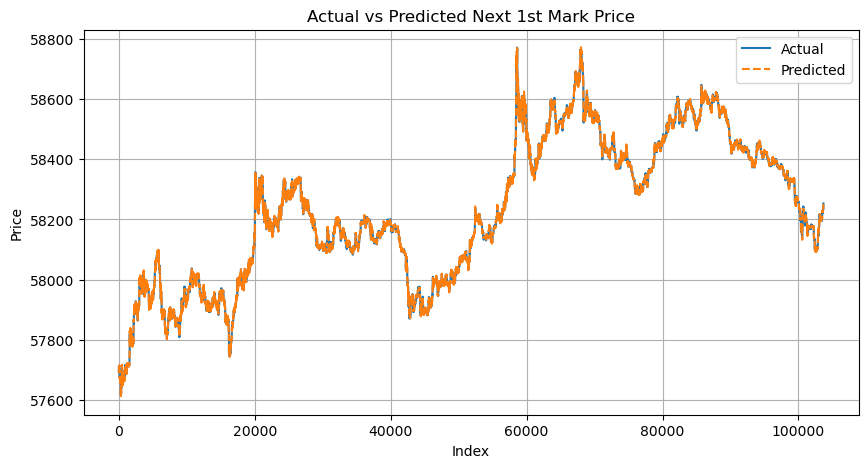

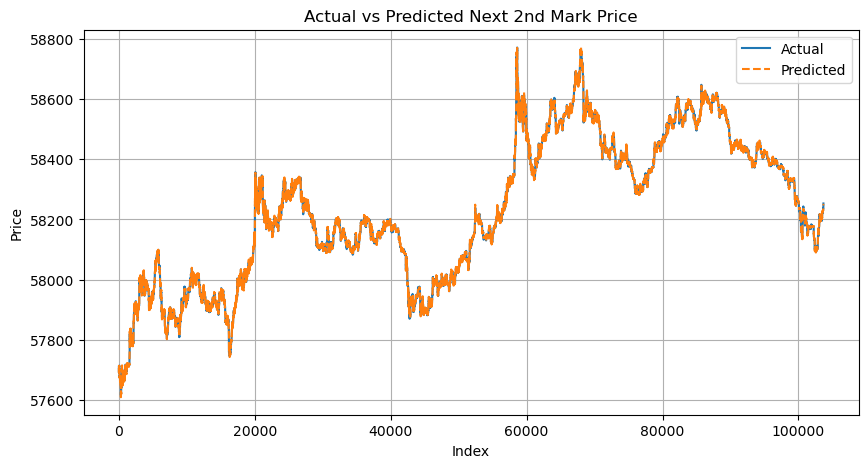

In [6]:
model = joblib.load("lr_two_label.pkl")

# 4. Make predictions
pred = model.predict(X_test)  # shape = (n_samples, 2)

# 5. Plot Actual vs Predicted for the 1st mark price
plt.figure(figsize=(10, 5))
plt.plot(y_test["next_1st_mark_price"].values)
plt.plot(pred[:, 0], linestyle="--")
plt.title("Actual vs Predicted Next 1st Mark Price")
plt.xlabel("Index")
plt.ylabel("Price")
plt.legend(["Actual", "Predicted"])
plt.grid(True)
plt.show()

# 6. Plot Actual vs Predicted for the 2nd mark price
plt.figure(figsize=(10, 5))
plt.plot(y_test["next_2nd_mark_price"].values)
plt.plot(pred[:, 1], linestyle="--")
plt.title("Actual vs Predicted Next 2nd Mark Price")
plt.xlabel("Index")
plt.ylabel("Price")
plt.legend(["Actual", "Predicted"])
plt.grid(True)
plt.show()